In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [11]:
data = pd.read_csv('genres_v2.csv')

/var/folders/d8/80hlk4y92n5dz9kj2z5fsvy00000gn/T/ipykernel_32274/2411600261.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('genres_v2.csv')


In [12]:
# Preprocessing the data
# Assuming 'genre' as the target variable for classification
X = data.select_dtypes(include=['float64', 'int64']).dropna()  # Selecting numerical features
y = data.loc[X.index, 'genre']  # Corresponding genres

In [13]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
def get_recommendations(input_song, metric):
    input_index = data[data['song_name'] == input_song].index[0]

    input_features = X.iloc[input_index]
    input_features = input_features.values.reshape(1, -1)
    nn = NearestNeighbors(n_neighbors=6, metric=metric)
    nn.fit(X)
    distances, indices = nn.kneighbors(input_features)
    nearest_neighbors = indices[0]

    recommended_songs = data.iloc[nearest_neighbors]['song_name']
    
    recommendations = recommended_songs[recommended_songs != input_song].tolist()
    return recommendations


In [16]:
# Test recommendations

metrics = ['euclidean', 'manhattan', 'cosine', 'minkowski']
input_song = 'XO Tour Llif3'  # Replace with a valid song name

# Generate recommendations for each metric
recommendations_by_metric = {}
for metric in metrics:
    recommendations = get_recommendations(input_song, metric)
    recommendations_by_metric[metric] = recommendations
    print('Recommendations for', input, 'using', metric, 'distance metric:')
    print(recommendations_by_metric[metric])


Recommendations for <bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x1087f8d90>> using euclidean distance metric:
['Pyro (leak 2019)', "Don't Bang My Line (feat. Night Lovell)", 'Mud', 'Fractals', 'Atlantis']
Recommendations for <bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x1087f8d90>> using manhattan distance metric:
['Pyro (leak 2019)', "Don't Bang My Line (feat. Night Lovell)", 'Mud', 'Anchus Definy', 'Fractals']
Recommendations for <bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x1087f8d90>> using cosine distance metric:
['I duckinf hatw you', 'Better Now', 'Sarcophagus (feat. $Uicideboy$)', 'shiver', 'Rambo']
Recommendations for <bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x1087f8d90>> using minkowski distance metric:
['Pyro (leak 2019)', "Don't Bang My Line (feat. Night Lovell)", 'Mud', 'Fractals', 'Atlantis']


/Users/adhishrajan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/adhishrajan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/adhishrajan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/adhishrajan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


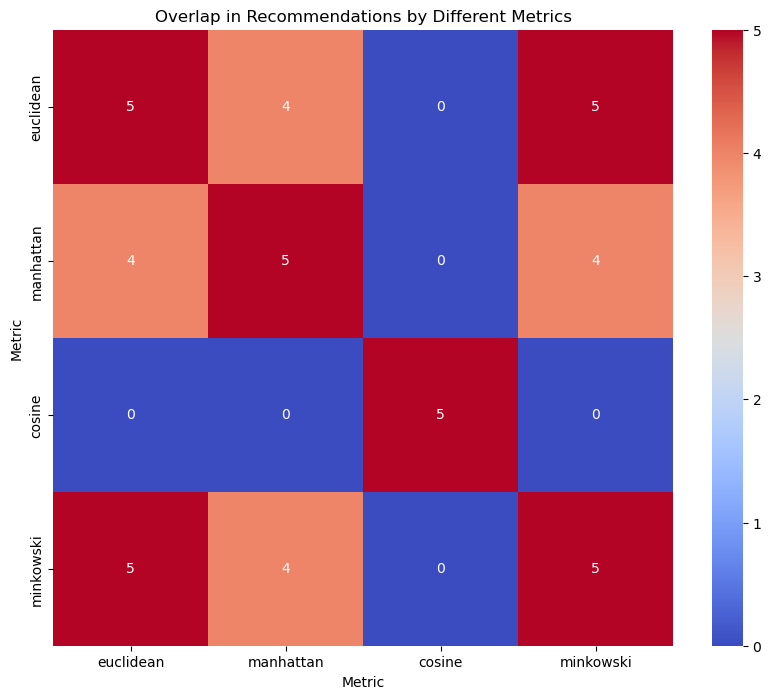

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# counting overlaps between recommendations of different metrics
overlap_matrix = {metric: [len(set(recommendations_by_metric[metric]) & set(recommendations_by_metric[m])) for m in metrics] for metric in metrics}

# convert to DataFrame for visualization
overlap_df = pd.DataFrame(overlap_matrix, index=metrics)

# heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(overlap_df, annot=True, cmap='coolwarm')
plt.title('Overlap in Recommendations by Different Metrics')
plt.xlabel('Metric')
plt.ylabel('Metric')
plt.show()


In [18]:
# Calculate intra-list similarity for recommendations
def calculate_intra_list_similarity(recommendations):
    # Fetching the indices of the recommended songs
    indices = []
    for song in recommendations:
        indices.append(data[data['song_name'] == song].index[0])
    # Calculating the intra-list similarity
    similarity = 0
    for i in range(len(indices)):
        for j in range(i+1, len(indices)):
            nameOfSong1 = data.iloc[indices[i]]['song_name']
            nameOfSong2 = data.iloc[indices[j]]['song_name']
            similarity += cosine_similarity(X.iloc[indices[i]].values.reshape(1, -1), X.iloc[indices[j]].values.reshape(1, -1))[0][0]
            print("Similarity between ", nameOfSong1, " and ", nameOfSong2, " is ", cosine_similarity(X.iloc[indices[i]].values.reshape(1, -1), X.iloc[indices[j]].values.reshape(1, -1))[0][0])
    return similarity / (len(indices) * (len(indices) - 1) / 2)
       

In [19]:
# calculate intra-list similarity for song recommendations
for r in recommendations_by_metric:
    print('For', r)
    intraListSimilarity = calculate_intra_list_similarity(recommendations_by_metric[r])
    print("Intra-list similarity for song recommendations: ", intraListSimilarity)
    print('________________________')


For euclidean
Similarity between  Pyro (leak 2019)  and  Don't Bang My Line (feat. Night Lovell)  is  0.9999999391205271
Similarity between  Pyro (leak 2019)  and  Mud  is  0.9999995984964225
Similarity between  Pyro (leak 2019)  and  Fractals  is  0.9999991310863483
Similarity between  Pyro (leak 2019)  and  Atlantis  is  0.999999036860704
Similarity between  Don't Bang My Line (feat. Night Lovell)  and  Mud  is  0.9999998500419613
Similarity between  Don't Bang My Line (feat. Night Lovell)  and  Fractals  is  0.999999529877572
Similarity between  Don't Bang My Line (feat. Night Lovell)  and  Atlantis  is  0.9999994599295798
Similarity between  Mud  and  Fractals  is  0.9999999108391253
Similarity between  Mud  and  Atlantis  is  0.999999879017465
Similarity between  Fractals  and  Atlantis  is  0.9999999975751512
Intra-list similarity for song recommendations:  0.9999996332844858
________________________
For manhattan
Similarity between  Pyro (leak 2019)  and  Don't Bang My Line (fea